# Descripción del problema

**Diabetes**

Se busca a partir de las 442 observaciones de enfermos con diabetes, predecir la progresión de la enfermedad a un años después de su diagnóstico.
La base de datos esta compuesta por 10 características y la variable a predecir:


*   age: edad en años
*   sex: Genero del paciente
*   bmi: índice de masa corporal
*   bp: presión arterial media
*   s1 tc, células T (un tipo de glóbulos blancos)
*   s2 ldl, lipoproteínas de baja densidad
*   s3 hdl, lipoproteínas de alta densidad
*   s4 tch, hormona estimulante de la tiroides
*   s5 ltg, lamotrigina
*   glu s6, nivel de azúcar en sangre

Este dataset se encuentra dentro de la librería sklearn:
diabetes = datasets.load_diabetes()

# Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf           # Aprendizaje Automático
import scipy.stats as stats
%matplotlib inline

import tensorflow as tf
optimizer = tf.keras.optimizers.Adam()

# Cargar Dataset

In [2]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

df['target'] = diabetes.target

print(diabetes.keys(),"\n")
print("Llaves del dataframe: ", df.keys(), "\n")

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']) 

Llaves del dataframe:  Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object') 



# Decripción de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


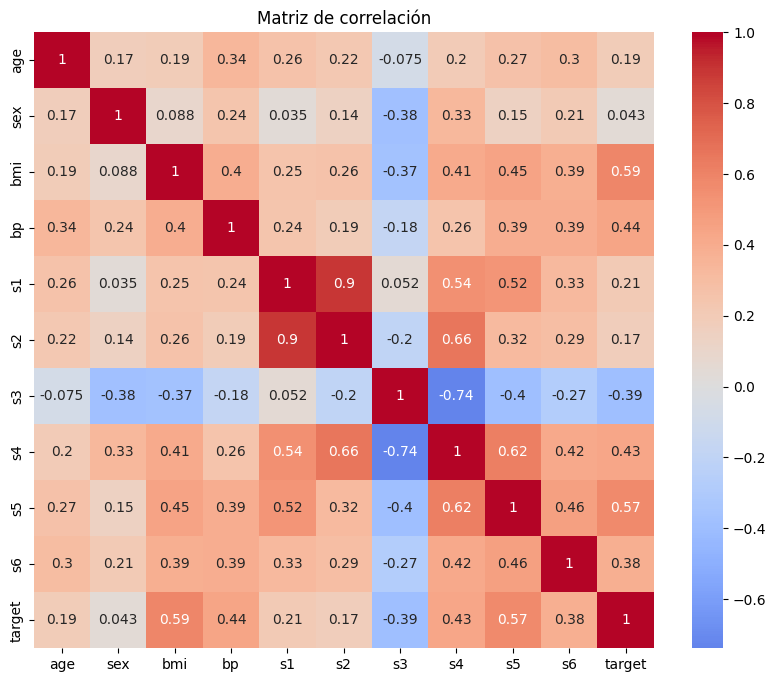

In [6]:
# encontrar correlación entre columnas (= corrplot)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación")
plt.show()

In [7]:
# Vemos si hay variables normales:

import scipy.stats as stats

normalidad = {} # diccionario para almacenar las variables normales

for col in df:
    # Prueba de Shapiro-Wilk
  shapiro_stat, shapiro_p = stats.shapiro(df[col].dropna())
    #shapiro_test = stats.shapiro(group[col]) # Otra forma

  print(f'{col}: p={shapiro_p:.4f} => {"Normal" if (shapiro_p > 0.05) else "No normal"}')

    # Guardar resultados
  normalidad[col] = {
    "Shapiro-Wilk p-valor": round(shapiro_p, 4),

    "Normalidad (p > 0.05)": shapiro_p > 0.05
  }

age: p=0.0000 => No normal
sex: p=0.0000 => No normal
bmi: p=0.0000 => No normal
bp: p=0.0001 => No normal
s1: p=0.0051 => No normal
s2: p=0.0013 => No normal
s3: p=0.0000 => No normal
s4: p=0.0000 => No normal
s5: p=0.0096 => No normal
s6: p=0.0410 => No normal
target: p=0.0000 => No normal


# Creacion de los conjuntos (train, val, test)

*   70% Entrenamiento
*   15% Validación
*   15% Prueba



In [8]:
import random

SEED = 69
random.seed(SEED)
np.random.seed(SEED)

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

# 70% train; 15% val; 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=SEED) # 30% pruebas (temp=división_temporal) y 70% entrenamiento (train)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=SEED) # Del 30%, la mitad (15%) a val y otro 15 a test

# Estandarización

$$x_{norm}=\frac{x-\mu}{\sigma}$$

El método de estandarización que usaré (y que cumple la fórmula presentada en el enunciado) será StandardScaler.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)

X_val_s = scaler.transform(X_val)

X_test_s = scaler.transform(X_test)

# Ajuste de las dimensiones de entrada

In [11]:
input_shape = X_train_s.shape[1]

# Cosntrucción del modelo

## Hiperparámetros

In [12]:
# Variables del modelo que se pueden configurar manualmente:

learning_rate = 0.01  # Controlador de la actualización de pesos (0 - 1) Recomendable 0.1 ó 0.01
epochs = 100          # Número de vueltas completas para entrenamiento dentro de la red neuronal
batch_size = 32       # (Default = 32 para datasets pequeños).Procesará 32 datos a la vez
hidden_units_1 = 64   # Empezamos con 64 en la primera capa
hidden_units_2 = 32   # Terminamos con 34, la mitad para la segunda capa, para evitar un incremento innecesario de complejidad de lso nodos
dropout_rate = 0.3    # Apagar neuronas al azar durante el entrenamiento, un 30% en cada iteración, para forzar nuevos caminos

## Creación del modelo

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(hidden_units_1, activation='relu', input_shape=(input_shape,)),
    Dropout(dropout_rate),
    Dense(hidden_units_2, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilación del modelo

In [14]:
from tensorflow.keras.optimizers import Adam


model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='mean_squared_error',        # Función de pérdida para regresión , también podemos poner 'mse'
    metrics=['mean_absolute_error']   # Métrica común para regresión, también podemos poner ['mae']
)

model.save('modelo_compilado.keras') # Lo guardamos para no repetir la compilación más adelante

## Entrenamiento del modelo

In [15]:
history = model.fit(
    X_train_s,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_s, y_val)
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 31118.0195 - mean_absolute_error: 156.5287 - val_loss: 20521.5762 - val_mean_absolute_error: 126.5460
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 26895.7422 - mean_absolute_error: 142.8600 - val_loss: 12776.0195 - val_mean_absolute_error: 93.7912
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 15278.5986 - mean_absolute_error: 101.0125 - val_loss: 4274.3906 - val_mean_absolute_error: 53.2285
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6504.8984 - mean_absolute_error: 61.4241 - val_loss: 5199.5703 - val_mean_absolute_error: 58.6653
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5289.8472 - mean_absolute_error: 56.1876 - val_loss: 3322.8347 - val_mean_absolute_error: 48.4563
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4814.7041 - mean_absolute_error: 54.0642 - val_loss: 2702.2412 - val_mean_absolute_error: 43.0448
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 

## Representación de las curvas de entrenamiento/validación

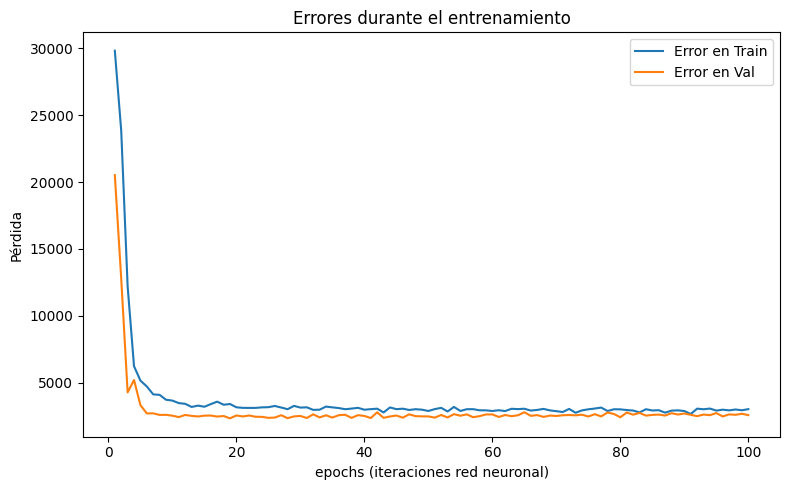

In [16]:
import matplotlib.pyplot as plt

# Extraer la historia de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear el eje de épocas
epochs_range = range(1, len(loss) + 1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Error en Train')
plt.plot(epochs_range, val_loss, label='Error en Val')
plt.title('Errores durante el entrenamiento')
plt.xlabel('epochs (iteraciones red neuronal)')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

🔴 A partir de las 60 ~ 80 repeticiones, no parece haber cambios en la disminución del error en Train.

## Aplicar métodos de regularización

🔴 Ya apliqué "dropout_rate" como parte de los hiperparámetros, y ahora que se me pide un nuevo método de regularización (tras haber visto la gráfica), y en mi investigación me he encontrado con "EarlyStopping", un método que detiene el entrenamiento cuando la métrica de validación deja de mejorar, lo que optimiaría el tiempo de entrenamiento.

Aplicaré el modelo de nuevo, junto con la visualización anterior para ver los cambios.

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# Recuperamos el modelo que compilamos anteriormente, para ahorrar recursos y no compilar múltiples veces
# (No vamos a añadir ningún método que tenga que agregarse dentro de model)
model = load_model('modelo_compilado.keras')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_s,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_s, y_val),
    callbacks=[early_stop]
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 31230.5586 - mean_absolute_error: 157.6861 - val_loss: 20494.0742 - val_mean_absolute_error: 126.5819
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26657.1621 - mean_absolute_error: 143.6579 - val_loss: 12635.6895 - val_mean_absolute_error: 93.5275
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13051.3057 - mean_absolute_error: 92.5266 - val_loss: 4370.5811 - val_mean_absolute_error: 53.9140
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6073.2388 - mean_absolute_error: 60.6925 - val_loss: 5251.6313 - val_mean_absolute_error: 58.2416
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6309.1094 - mean_absolute_error: 61.9067 - val_loss: 3239.0210 - val_mean_absolute_error: 47.8692
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4665.0366 - mean_absolute_error: 54.3032 - val_loss: 2774.6484 - val_mean_absolute_error: 44.0134
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - lo

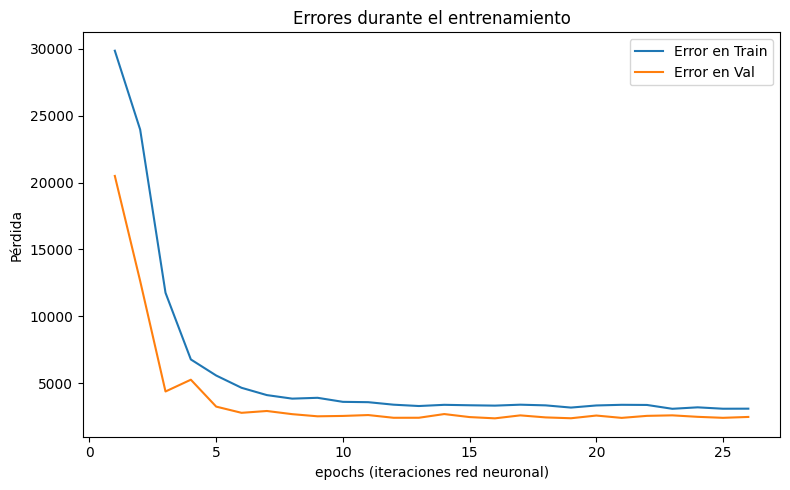

In [18]:
import matplotlib.pyplot as plt

# Extraer la historia de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear el eje de épocas
epochs_range = range(1, len(loss) + 1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Error en Train')
plt.plot(epochs_range, val_loss, label='Error en Val')
plt.title('Errores durante el entrenamiento')
plt.xlabel('epochs (iteraciones red neuronal)')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

🔴 Ahora podemos apreciar cómo efectivamente "EarlyStopping" evita el uso de recursos innecesarios para la optimización del modelo.

## Selección del mejor modelo

## Cálculo del desempeño del modelo selecionado